# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

![](https://peltarion.com/static/fashion-mnist_long.png)

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [5]:
import torch
import helper
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])

# Download and load the training / testing data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

images, labels = next(iter(trainloader))
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


# Visualize a Batch of Training Data

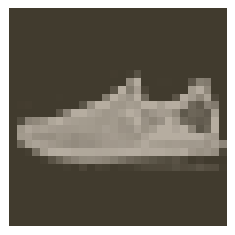

In [6]:
# Show the image
images, labels = next(iter(trainloader))
helper.imshow(images[12,:]);
#plt.imshow(images[10].numpy().squeeze(), cmap='Greys_r');

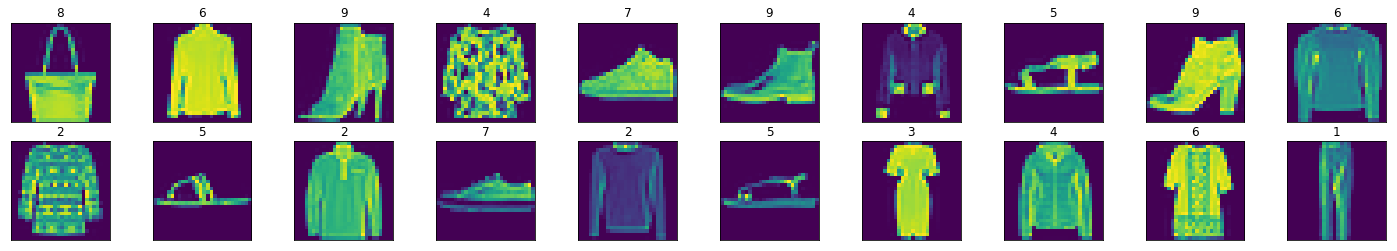

In [7]:

dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()


fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]))
    
    ax.set_title(str(labels[idx].item()))


## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [8]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden_1 = nn.Linear(784, 256)
        self.hidden_2 = nn.Linear(256, 128)
        self.hidden_3 = nn.Linear(128, 64)
        self.output = nn.Linear(64,10)
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
        
    def forward(self,x):
        # Flatten images
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.hidden_1(x)))
        x = self.dropout(F.relu(self.hidden_2(x)))
        x = self.dropout(F.relu(self.hidden_3(x)))
        x = F.log_softmax(self.output(x), dim=1)
        return x
    


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) (something like `nn.CrossEntropyLoss` or `nn.NLLLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [9]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [10]:
epochs = 18
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Forward pass, get our logits
        logps = model(images)
        #Calculate the loss with the logps and the labels
        loss = criterion(logps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
         # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
            
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epochs: {}/{}.. ".format(e+1, epochs),
              "Traning Loss: {:.3f}..".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
             "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epochs: 1/18..  Traning Loss: 0.922.. Test Loss: 0.552..  Test Accuracy: 0.795
Epochs: 2/18..  Traning Loss: 0.556.. Test Loss: 0.480..  Test Accuracy: 0.822
Epochs: 3/18..  Traning Loss: 0.483.. Test Loss: 0.445..  Test Accuracy: 0.836
Epochs: 4/18..  Traning Loss: 0.446.. Test Loss: 0.422..  Test Accuracy: 0.844
Epochs: 5/18..  Traning Loss: 0.421.. Test Loss: 0.414..  Test Accuracy: 0.849
Epochs: 6/18..  Traning Loss: 0.399.. Test Loss: 0.394..  Test Accuracy: 0.858
Epochs: 7/18..  Traning Loss: 0.384.. Test Loss: 0.381..  Test Accuracy: 0.863
Epochs: 8/18..  Traning Loss: 0.368.. Test Loss: 0.375..  Test Accuracy: 0.864
Epochs: 9/18..  Traning Loss: 0.356.. Test Loss: 0.373..  Test Accuracy: 0.863
Epochs: 10/18..  Traning Loss: 0.348.. Test Loss: 0.362..  Test Accuracy: 0.870
Epochs: 11/18..  Traning Loss: 0.336.. Test Loss: 0.364..  Test Accuracy: 0.871
Epochs: 12/18..  Traning Loss: 0.330.. Test Loss: 0.348..  Test Accuracy: 0.875
Epochs: 13/18..  Traning Loss: 0.321.. Test Loss:

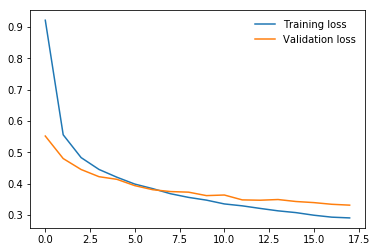

In [11]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

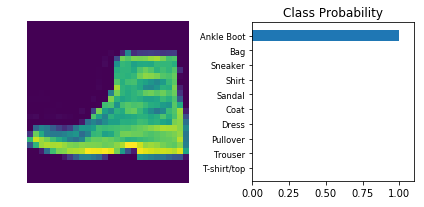

In [16]:
# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

#Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))
helper.view_classify(img, ps, version='Fashion')